In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('archive/bangalore_urban_flood_prediction_AI.csv')

# Basic information about the dataset
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Latitude                   3000 non-null   float64
 1   Longitude                  3000 non-null   float64
 2   Altitude                   3000 non-null   float64
 3   Rainfall_Intensity         3000 non-null   float64
 4   Temperature                3000 non-null   float64
 5   Humidity                   3000 non-null   float64
 6   Atmospheric_Pressure       3000 non-null   float64
 7   River_Level                3000 non-null   float64
 8   Drainage_Capacity          3000 non-null   float64
 9   Drainage_System_Condition  3000 non-null   int64  
 10  Population_Density         3000 non-null   float64
 11  Urbanization_Level         3000 non-null   int64  
 12  flood                      3000 non-null   int64  
dtypes: float64(10), int64(3)
memory usage: 304.8 KB


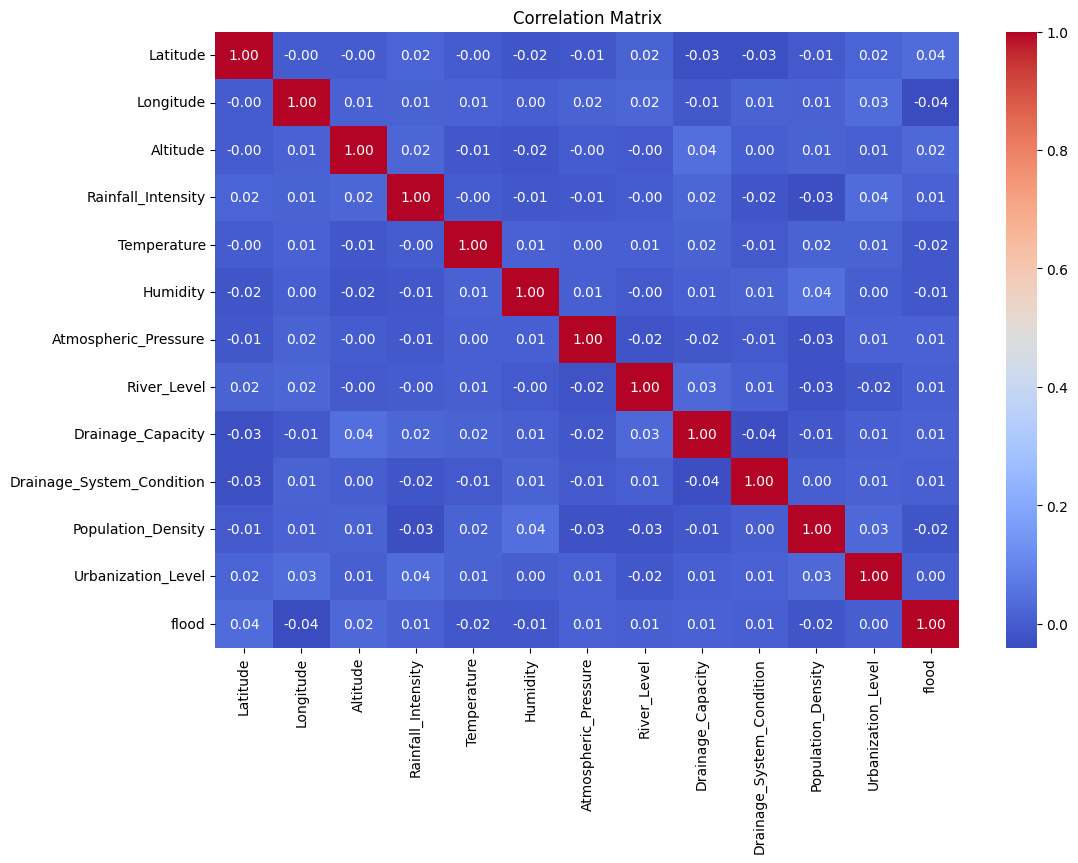

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [7]:
import folium
import pandas as pd

# Load your dataset
df = pd.read_csv("archive/bangalore_urban_flood_prediction_AI.csv")  # replace with your dataset path

# Create a map centered around Bangalore's coordinates
bangalore_map = folium.Map(location=[12.9716, 77.5946], zoom_start=11)

# Add data points to the map
for _, row in df.iterrows():
    color = 'red' if row['flood'] == 1 else 'green'
    folium.CircleMarker(
        location=[row['Latitude'], row['Longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        popup=f"Rainfall Intensity: {row['Rainfall_Intensity']} mm\nRiver Level: {row['River_Level']} m",
    ).add_to(bangalore_map)

# Save the map to an HTML file
bangalore_map.save("bangalore_flood_map.html")


In [12]:
import pandas as pd
import folium

# Load the dataset
data = pd.read_csv('archive/bangalore_urban_flood_prediction_AI.csv')

# Initialize the map centered at an average location
map_center = [data['Latitude'].mean(), data['Longitude'].mean()]
flood_map = folium.Map(location=map_center, zoom_start=12)

# Function to determine color based on river level
def get_color(river_level):
    if river_level < 6.0:
        return 'green'
    elif river_level < 7.0:
        return 'yellow'
    elif river_level < 8.0:
        return 'orange'
    else:
        return 'red'

# Add markers based on the flood data
for _, row in data.iterrows():
    if row['flood'] == 1:  # Only add markers where flood == 1
        color = get_color(row['River_Level'])
        folium.CircleMarker(
            location=(row['Latitude'], row['Longitude']),
            radius=8,
            color=color,
            fill=True,
            fill_opacity=0.5,
            popup=f"River Level: {row['River_Level']}"
        ).add_to(flood_map)

# Save the map to an HTML file
flood_map.save('flood_prediction_map.html')

In [1]:
# Import necessary libraries for EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap
from scipy.stats import pearsonr


In [2]:
# Load the dataset (update the file path as needed)
data = pd.read_csv('archive/bangalore_urban_flood_prediction_AI.csv')

# Display the first few rows to get a sense of the data
data.head()


,Latitude,Longitude,Altitude,Rainfall_Intensity,Temperature,Humidity,Atmospheric_Pressure,River_Level,Drainage_Capacity,Drainage_System_Condition,Population_Density,Urbanization_Level,flood
0,13.031867,77.531658,997.63,40.06,33.83,98.73,931.65,4.58,89.96,5,24933.97,3,1
1,12.877241,77.525416,893.85,138.76,29.91,83.63,922.12,6.65,1.30,4,9937.05,10,1
2,12.899599,77.517722,934.88,65.84,16.35,73.36,934.76,5.55,76.12,9,11088.95,2,0
3,12.893955,77.552339,929.47,138.25,31.94,44.72,930.82,6.46,22.18,4,12124.49,7,0
4,12.984063,77.538374,901.12,125.92,33.56,47.63,941.29,6.83,30.38,5,8446.10,5,1


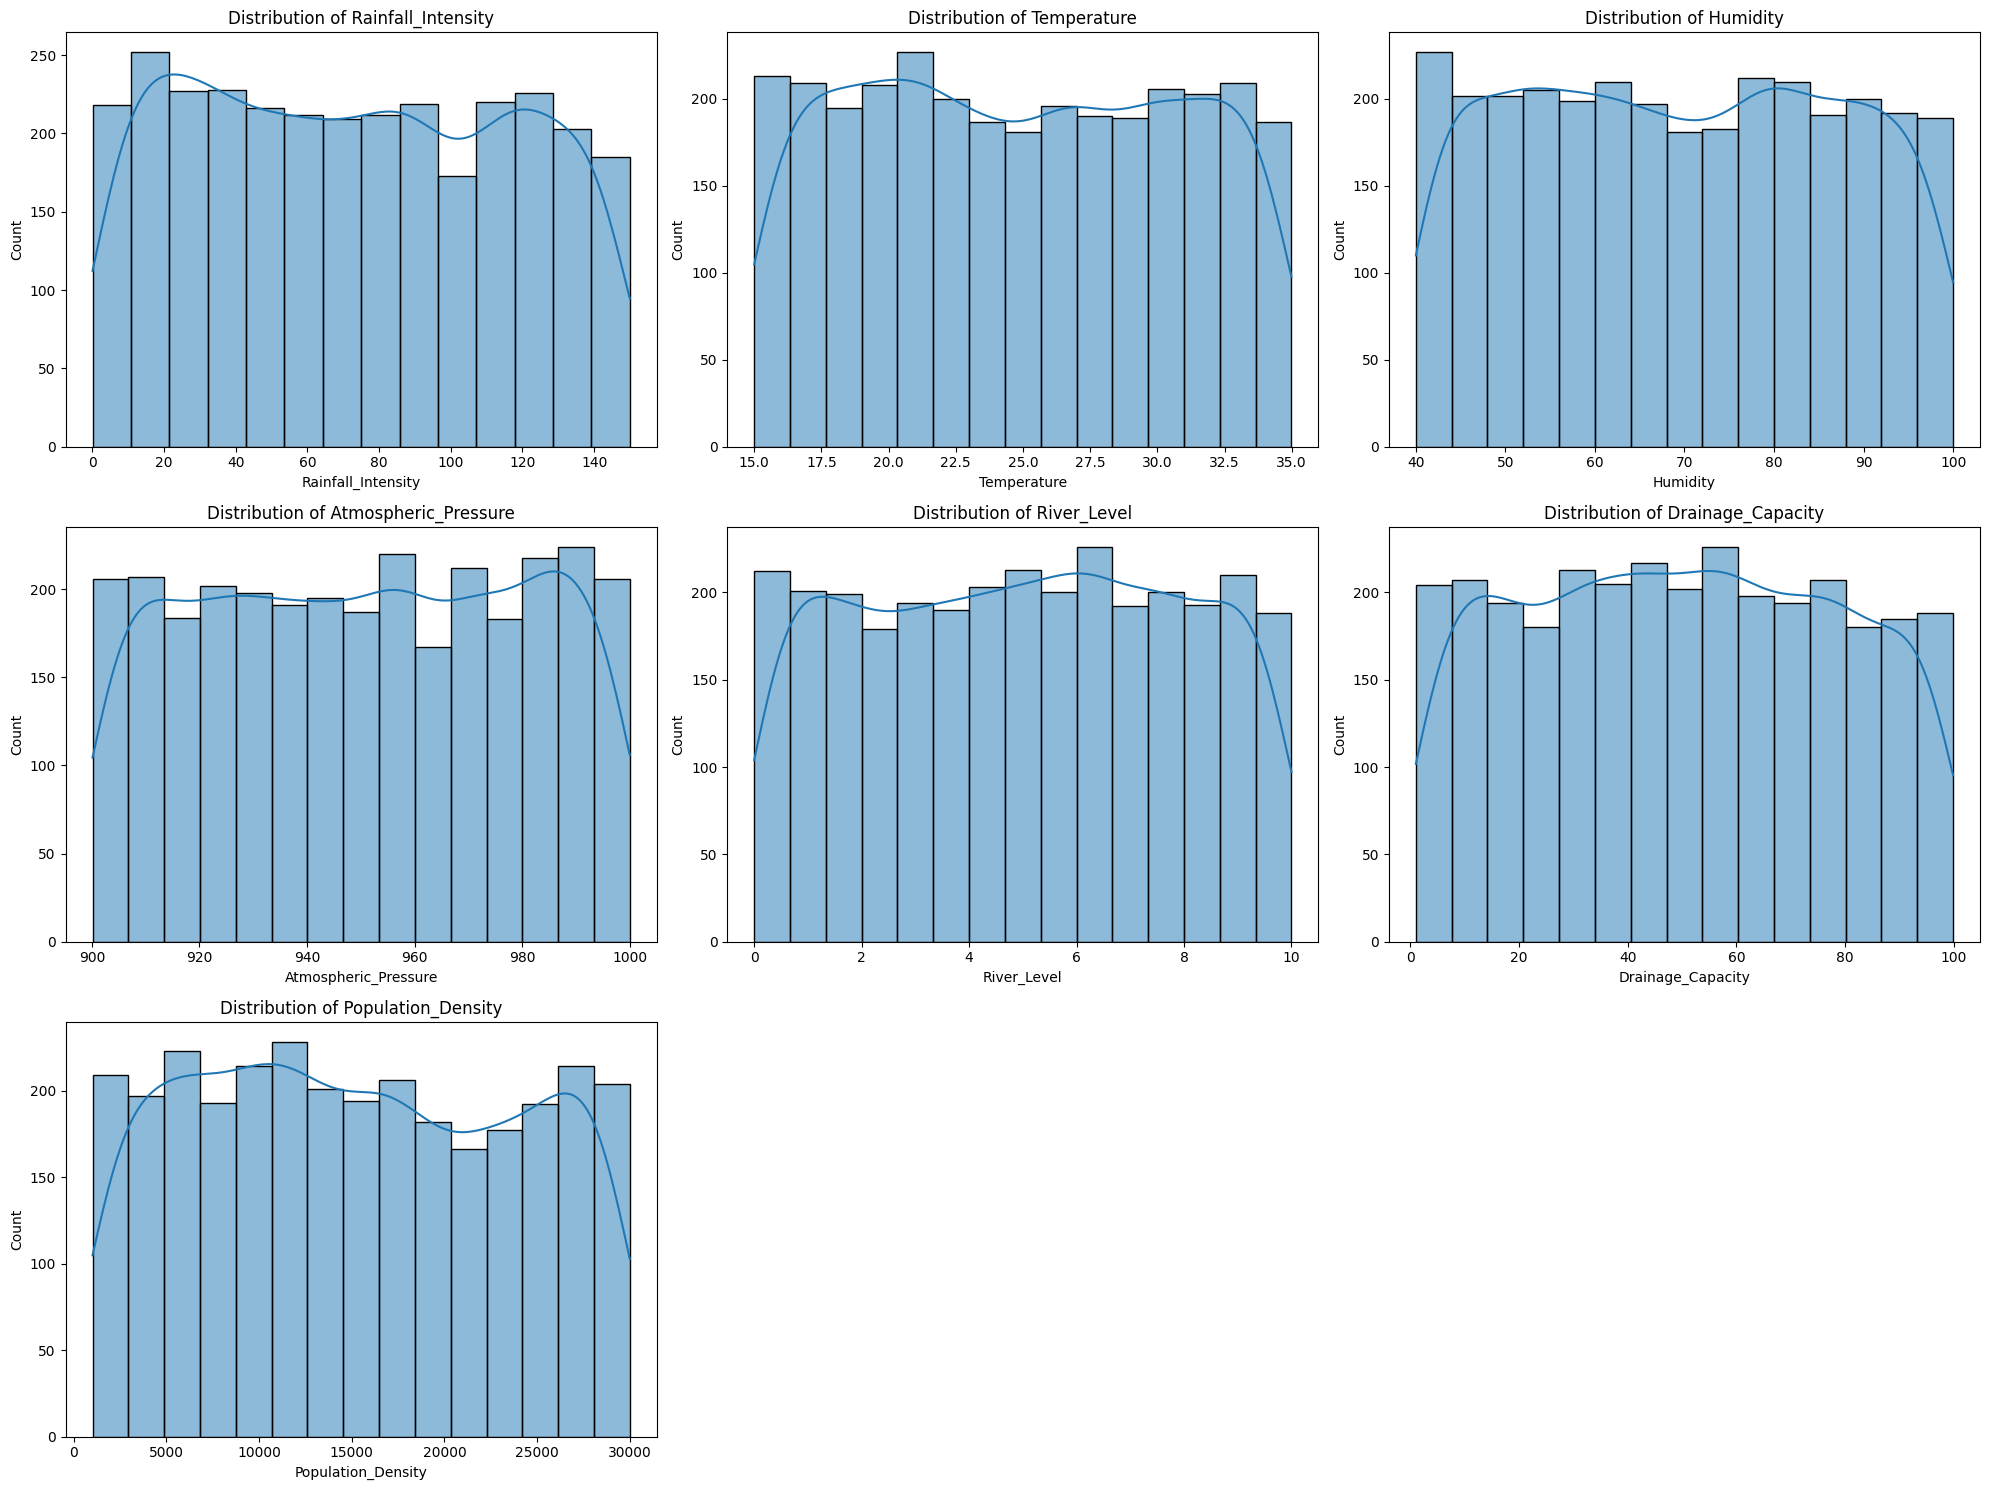

In [3]:
# Plotting distributions for continuous variables
plt.figure(figsize=(20, 15))
features = ["Rainfall_Intensity", "Temperature", "Humidity", "Atmospheric_Pressure", 
            "River_Level", "Drainage_Capacity", "Population_Density"]

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()


In [5]:
# Visualize flood occurrences on a map with folium (latitude, longitude)
map_flood = folium.Map(location=[data['Latitude'].mean(), data['Longitude'].mean()], zoom_start=10)

# Add heatmap of flood-prone areas
heat_data = data[data['flood'] == 1][['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(map_flood)

# Display the map
map_flood.save("flood_heatmap.html")
map_flood
